In [1]:
import yfinance as yf 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm, lines
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

plt.style.use('bmh')

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = yf.download('GOOG', period='10y', interval='1d', auto_adjust=True)
data = data.resample('M').last()
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2012-02-29,308.144989,311.631927,306.600800,307.970642,6297316
2012-03-31,324.658112,325.524841,319.303162,319.422729,4638722
2012-04-30,305.350464,306.889709,299.183594,301.295685,4832646
2012-05-31,293.260773,293.898407,288.418945,289.345459,5958852
2012-06-30,286.406464,288.981812,285.031616,288.951935,5057887


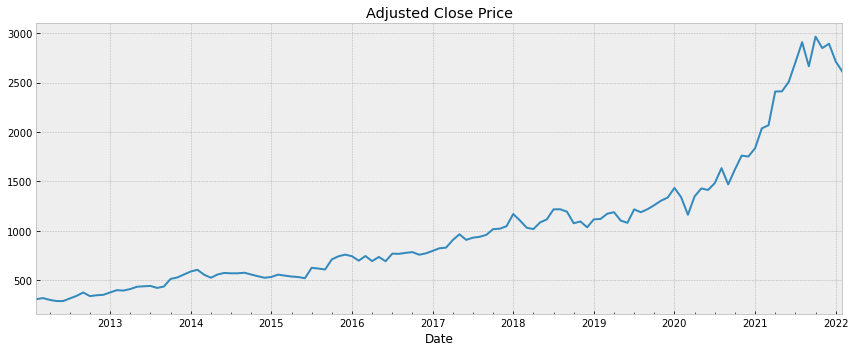

In [4]:
data.Close.plot(figsize=(12,5), title='Adjusted Close Price')
plt.tight_layout()
plt.show()

In [5]:
test_len = int(len(data)*0.1)
data_train = data.iloc[:-test_len, :]
data_test = data.iloc[-test_len:, :]

In [6]:
ses_1 = SimpleExpSmoothing(data_train.Close).fit(smoothing_level=0.2)
ses_forecast_1 = ses_1.forecast(test_len)

ses_2 = SimpleExpSmoothing(data_train.Close).fit(smoothing_level=0.5)
ses_forecast_2 = ses_2.forecast(test_len)

ses_3 = SimpleExpSmoothing(data_train.Close).fit()
alpha = ses_3.model.params['smoothing_level']
ses_forecast_3 = ses_3.forecast(test_len)

In [7]:
colors_map = cm.get_cmap('tab10').colors
line_styles = list(lines.lineStyles.keys())
line_styles.remove('None')

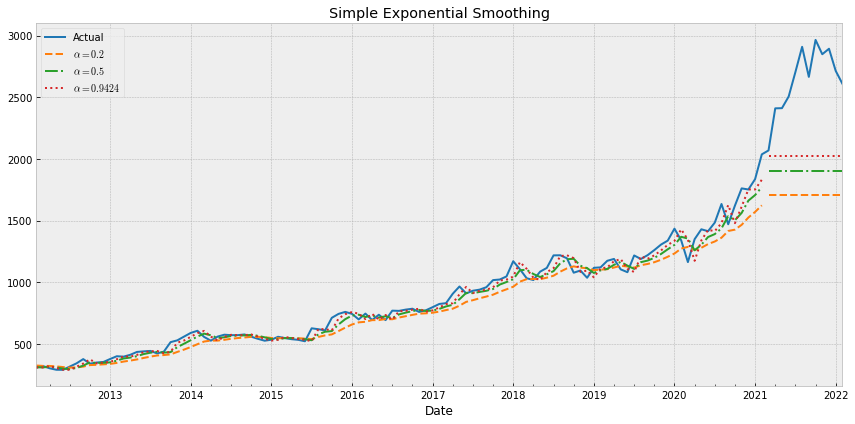

In [8]:
data.Close.plot(label='Actual', legend=True, figsize=(12,6), 
                color=colors_map[0], linestyle=line_styles[0],
                title="Simple Exponential Smoothing")

ses_1.fittedvalues.plot(color=colors_map[1], label=r'$\alpha=0.2$', legend=True, linestyle=line_styles[1])
ses_forecast_1.plot(color=colors_map[1], linestyle=line_styles[1])

ses_2.fittedvalues.plot(color=colors_map[2], label=r'$\alpha=0.5$', legend=True, linestyle=line_styles[2])
ses_forecast_2.plot(color=colors_map[2], linestyle=line_styles[2])

ses_3.fittedvalues.plot(color=colors_map[3], label=fr'$\alpha={alpha:.4f}$', legend=True, linestyle=line_styles[3])
ses_forecast_3.plot(color=colors_map[3], linestyle=line_styles[3])

plt.tight_layout()
plt.show()

In [9]:
hs_1 = Holt(data_train.Close).fit()
hs_forecast_1 = hs_1.forecast(test_len)

hs_2 = Holt(data_train.Close, exponential=True).fit()
hs_forecast_2 = hs_2.forecast(test_len)

hs_3 = Holt(data_train.Close, exponential=True, damped=True).fit(damping_slope=0.99)
hs_forecast_3 = hs_3.forecast(test_len)

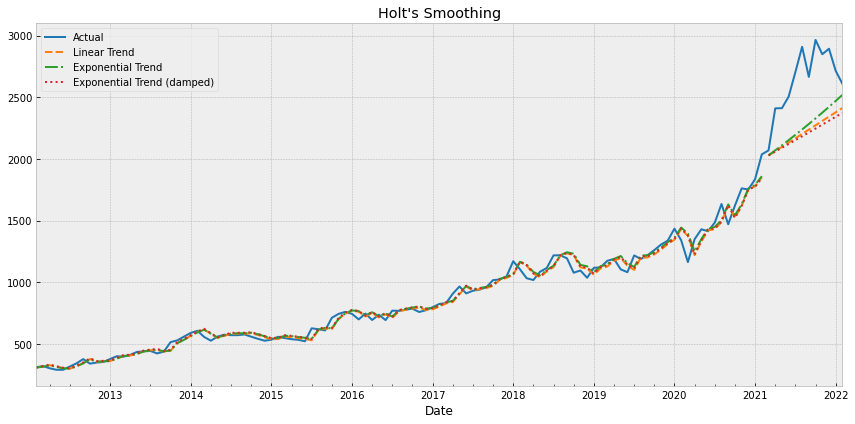

In [10]:
data.Close.plot(figsize=(12,6), title="Holt's Smoothing", 
                linestyle=line_styles[0], color=colors_map[0],
                label='Actual', legend=True)

hs_1.fittedvalues.plot(color=colors_map[1], linestyle=line_styles[1], label='Linear Trend', legend=True)
hs_forecast_1.plot(color=colors_map[1], linestyle=line_styles[1])

hs_2.fittedvalues.plot(color=colors_map[2], linestyle=line_styles[2], label='Exponential Trend', legend=True)
hs_forecast_2.plot(color=colors_map[2], linestyle=line_styles[2])

hs_3.fittedvalues.plot(color=colors_map[3], linestyle=line_styles[3], label='Exponential Trend (damped)', legend=True)
hs_forecast_3.plot(color=colors_map[3], linestyle=line_styles[3])

plt.tight_layout()
plt.show()

In [11]:
hw_1 = ExponentialSmoothing(data_train.Close, trend='mul', 
                            seasonal='add', seasonal_periods=12).fit()
hw_forecast_1 = hw_1.forecast(test_len)

hw_2 = ExponentialSmoothing(data_train.Close, trend='mul', 
                            seasonal='add', seasonal_periods=12, damped=True).fit()
hw_forecast_2 = hw_2.forecast(test_len)

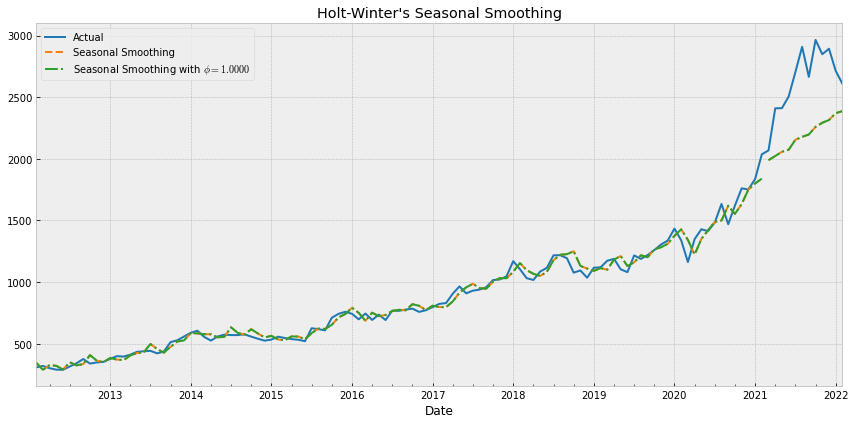

In [12]:
data.Close.plot(figsize=(12,6), title="Holt-Winter's Seasonal Smoothing", 
                linestyle=line_styles[0], color=colors_map[0],
                label='Actual', legend=True)

hw_1.fittedvalues.plot(color=colors_map[1], linestyle=line_styles[1], 
                       label='Seasonal Smoothing', legend=True)
hw_forecast_1.plot(color=colors_map[1], linestyle=line_styles[1])

phi = hw_2.model.params['damping_slope']
hw_2.fittedvalues.plot(color=colors_map[2], linestyle=line_styles[2], 
                       label=fr'Seasonal Smoothing with $\phi={phi:.4f}$', 
                       legend=True)
hw_forecast_2.plot(color=colors_map[2], linestyle=line_styles[2])

plt.tight_layout()
plt.show()